# Comparing linear elastic to hyper-elastic response

In this exercise you have to compare the load-displacement response of linear elastic and hyperelastic models under the same loading condition.


In [22]:
from dolfin import *
from matplotlib import pyplot as plt
# Create mesh and define function space


def get_reaction_force(mesh):
    mf = MeshFunction("size_t", mesh, 1)
    mf.set_all(0)
    clamped_boundary.mark(mf, 1)
    ds = Measure("ds", subdomain_data=mf)
    # Define the Neumann boundary condition for the traction vector
    n = FacetNormal(mesh)
    traction = dot(sigma(u), n)
    # Integrate to get the traction vector
    reaction = assemble(traction[1] * ds(1))
    return reaction

# Elastic


In [23]:
def epsilon(u):
    return 0.5*(grad(u) + grad(u).T)


def sigma(u):
    return lmbda*tr(epsilon(u))*Identity(dim) + 2*mu*epsilon(u)

In [24]:
length, depth = 3000, 300
num_ele_along_depth = 10
ele_size = depth/num_ele_along_depth
mesh = RectangleMesh(Point(0, 0), Point(length, depth),
                     int(length/ele_size), int(depth/ele_size))

## Mark boundary subdomians
Mark the left edge as clamped_boundary and right edge as load_boundary

In [25]:
clamped_boundary = 
load_boundary = 

In [26]:
U = VectorFunctionSpace(mesh, 'CG', 2)
dim = mesh.topology().dim()
fixed = Expression(("0.0", "0.0"), degree=1)
load = Expression(("-disp_step*t"), disp_step=100, t=1, degree=1)

bcl = DirichletBC(U, fixed, clamped_boundary)
bcr = DirichletBC(U.sub(1), load, load_boundary)

bc = [bcl, bcr]

E, nu = 1, 0.45

## Define the Lame's parameters

In [ ]:
lmbda = 
mu =

In [27]:
# Define variational problem
u, v = TrialFunction(U), TestFunction(U)

## Set the body force to 0 and define the linear and bilenear forms of the linear elastic problem

In [ ]:
f = 
a = 
L = 

In [28]:
u = Function(U)
problem = LinearVariationalProblem(a, L, u, bc)
solver = LinearVariationalSolver(problem)

elastic_reaction_force = []
elastic_displacement = []
for t in range(0, 30):
    load.t = t
    solver.solve()
    elastic_displacement.append(load.t*100)
    elastic_reaction_force.append(get_reaction_force(mesh))

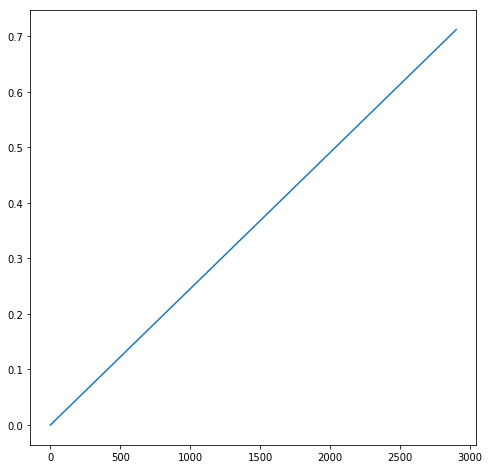

In [29]:
plt.figure(figsize=(8, 8))
plt.plot(elastic_displacement, elastic_reaction_force)

# Hyperelastic


Define the material model parameter. Check day-4, tutorial-1

In [30]:
def sigma(u):
    I = 
    F = variable(grad(u) + I)
    J = 
    C =
    I1 = 
    energy = 
    return 2 * diff(energy, F)

In [32]:
# Define functions
du = TrialFunction(U)            # Incremental displacement
v = TestFunction(U)             # Test function
u = Function(U)                 # Displacement from previous iteration
B = Constant((0.0, 0.0))  # Body force per unit volume
T = Constant((0.0, 0.0))  # Traction force on the boundary

# Kinematics
d = u.geometric_dimension()
I = Identity(d)             # Identity tensor
F = 
C = 

# Invariants of deformation tensors
Ic = 
J = 

# Stored strain energy density (compressible neo-Hookean model)
psi = (mu/2)*(Ic - 3) - mu*ln(J) + (lmbda/2)*(ln(J))**2

# Total potential energy
Pi = psi*dx - dot(B, u)*dx - dot(T, u)*ds

# Compute first variation of Pi (directional derivative about u in the direction of v)
F = derivative(Pi, u, v)

# Compute Jacobian of F
J = derivative(F, u, du)

# Compute solution
problem = NonlinearVariationalProblem(F, u, bc, J)
solver = NonlinearVariationalSolver(problem)

prm = solver.parameters
prm['newton_solver']['absolute_tolerance'] = 1E-7
prm['newton_solver']['relative_tolerance'] = 1E-7
prm['newton_solver']['maximum_iterations'] = 1000
prm['newton_solver']['linear_solver'] = 'gmres'
prm['newton_solver']['preconditioner'] = 'hypre_euclid'
prm['newton_solver']['krylov_solver']['absolute_tolerance'] = 1E-7
prm['newton_solver']['krylov_solver']['relative_tolerance'] = 1E-7
prm['newton_solver']['krylov_solver']['maximum_iterations'] = 1000

reaction_force = []
displacement = []
for t in range(0, 30):
    load.t = t
    solver.solve()
    displacement.append(load.t*100)
    reaction_force.append(get_reaction_force(mesh))

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


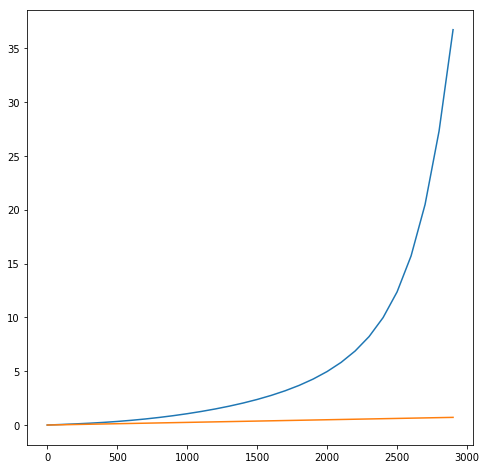

In [33]:
plt.figure(figsize=(8, 8))
plt.plot(displacement, reaction_force)
plt.plot(elastic_displacement, elastic_reaction_force)